In [7]:
#import all necesary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading a CSV file
data = pd.read_csv('Titanic.csv')

#This will keep the original dataset by creating new copy of it
df = data.copy()

# Displaying the first few rows
df.head()


,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [9]:
data = pd.read_csv('Titanic.csv')
df = data.copy()
df.tail(10)

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
881,male,33.0,0,0,7.8958,S,Third,man,True,0
882,female,22.0,0,0,10.5167,S,Third,woman,True,0
883,male,28.0,0,0,10.5000,S,Second,man,True,0
884,male,25.0,0,0,7.0500,S,Third,man,True,0
885,female,39.0,0,5,29.1250,Q,Third,woman,False,0
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1
890,male,32.0,0,0,7.7500,Q,Third,man,True,0


In [3]:
# Checking data types and summary statistics
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB
None
              age       sibsp       parch        fare    survived
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208    0.383838
std     14.526497    1.102743    0.806057   49.693429    0.486592
min      0.420000    0.000000    0.000000    0.000000    0.000000
25%     20.125000   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [6]:
df.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


>Identifying missing values.
>
>Options for handling missing data (removing, filling)

In [4]:
# Handling missing data
#df.dropna()  # Removing rows with missing values
#df.loc[df['PassengerClass'] == '1st', 'Age'].fillna(df[df['embarked'] == '1st']['Age'].median(), inplace=True)
# 'embarked' and 'age' have missing values. 
#We will fill the 'embarked' missing values with mode because there are only 3 missing values
mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)

#df.fillna(0)  # Filling missing values with zeros


In [10]:
mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)

In [11]:
#verify if 'embarked' has been filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [6]:
#We will fill the 'age' missing values with median
# Calculate the median age
median_age = df['age'].median()

# Fill missing values in the 'age' column with the median age
df['age'].fillna(median_age, inplace=True)


In [13]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

In [14]:
# Verify that missing values have been filled
print(df['age'].isna().sum())  # Should print 0, indicating no missing values in the 'Age' column

0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       891 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


In [ ]:
#Students' activity
# Load Titanic.csv in your work enviroment
# Copy the dataset using copy() function
# perform info() and describe() functions on it

>Data Cleaning and Transformation
>
>Removing duplicates.
>
>Changing data types.
>
>Renaming columns.

In [16]:
# Check for duplicates
duplicates = df.duplicated()

In [17]:
# Show the rows that are duplicates
duplicate_rows = df[duplicates]
print(duplicate_rows)

        sex   age  sibsp  parch     fare embarked   class    who  alone  \
47   female  28.0      0      0   7.7500        Q   Third  woman   True   
55     male  28.0      0      0  35.5000        S   First    man   True   
76     male  28.0      0      0   7.8958        S   Third    man   True   
77     male  28.0      0      0   8.0500        S   Third    man   True   
87     male  28.0      0      0   8.0500        S   Third    man   True   
..      ...   ...    ...    ...      ...      ...     ...    ...    ...   
870    male  26.0      0      0   7.8958        S   Third    man   True   
877    male  19.0      0      0   7.8958        S   Third    man   True   
878    male  28.0      0      0   7.8958        S   Third    man   True   
884    male  25.0      0      0   7.0500        S   Third    man   True   
886    male  27.0      0      0  13.0000        S  Second    man   True   

     survived  
47          1  
55          1  
76          0  
77          0  
87          0  
.. 

#### Yes, there are duplicated rows but they are unique values. We will not need to drop them.

In [10]:
# Removing duplicates
#df.drop_duplicates()

In [18]:
#Check for data type of each column or field
df.dtypes

sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
class        object
who          object
alone          bool
survived      int64
dtype: object

#### We noticed 'age' column should not be float but integer. We will then change the data type of 'age' to integer

In [12]:
# Changing data type of 'age' from float to integer
df['age'] = df['age'].astype(int)

In [20]:
#Confirm wether the 'age' data type has changed or not
current_age_dtype = df['age'].dtype
current_age_dtype

dtype('int32')

In [22]:
print(df['age'].dtype)

int32


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       891 non-null    int32  
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(1), int32(1), int64(3), object(4)
memory usage: 60.2+ KB


In [25]:
# Renaming columns in the titanic dataset
df.rename(columns={'sex': 'Gender','age': 'Age','sibsp': 'Siblings',
                   'parch': 'Parent_Children','fare': 'Fare',
                   'embarked': 'Embarked','class': 'Class',
                   'who': 'Who','alone': 'Alone',
                   'survived': 'Survived'}, inplace=True)


In [26]:
#Check renaminf of columns
df.head()

,Gender,Age,Siblings,Parent_Children,Fare,Embarked,Class,Who,Alone,Survived
0,male,22,1,0,7.2500,S,Third,man,False,0
1,female,38,1,0,71.2833,C,First,woman,False,1
2,female,26,0,0,7.9250,S,Third,woman,True,1
3,female,35,1,0,53.1000,S,First,woman,False,1
4,male,35,0,0,8.0500,S,Third,man,True,0


>Selecting columns and rows
>
>Using conditions for data filtering

In [18]:
# Selecting columns
age_column = df['Age']
age_column

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    28
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [27]:
# Filtering data for total number of children
children_sum = df[df['Age'] <= 12]['Age'].sum()

#df['Age'] <= 12 creates a Boolean mask, which is True for rows where the 'Age' is less than or equal to 12.
#df[df['Age'] <= 12] filters the DataFrame to include only the rows where the condition is True.
#['Age'] selects the 'Age' column from the filtered DataFrame.
#.sum() calculates the sum of the 'Age' column for the selected rows and assigns it to the 'children' variable.

children_sum

324

In [28]:
# Filtering data for total number of teenagers
teenager_sum = df[(df['Age'] >= 13) & (df['Age'] <= 19)]['Age'].sum()
teenager_sum

1635

In [29]:
# Filtering data for total number of adult
adult_sum = df[df['Age'] >= 20]['Age'].sum()
adult_sum

24188

>Data Aggregation and Grouping 
>
>Grouping data by columns
>
>Applying aggregation functions (sum, mean, count)


In [31]:
# Grouping data by 'Age' column
grouped_fare = df.groupby('Fare')

In [32]:
# Aggregating data
average_age = grouped_data['Fare'].mean()
average_age

Fare
0.0000        0.0000
4.0125        4.0125
5.0000        5.0000
6.2375        6.2375
6.4375        6.4375
              ...   
227.5250    227.5250
247.5208    247.5208
262.3750    262.3750
263.0000    263.0000
512.3292    512.3292
Name: Fare, Length: 248, dtype: float64

In [33]:
total_age_count = grouped_data['Fare'].count()
total_age_count

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: Fare, Length: 248, dtype: int64

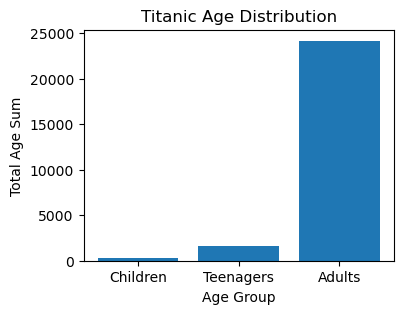

In [34]:
# Basic data visualization
# Data
categories = ['Children', 'Teenagers', 'Adults']
totals = [children_sum, teenager_sum, adult_sum]

# Create a bar chart
plt.figure(figsize=(4, 3))
#plt.bar(categories, totals, color=['blue', 'green', 'orange'])
plt.bar(categories, totals)
plt.title('Titanic Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Total Age Sum')
plt.show();



In [47]:
#Students' activity
# Write a code to calculate mean for the entire 'Fare' column and display it
# Write a code to calculate median for the entire 'Fare' column and display it
# Write a code to determine how many people survived titanic